In [1]:
import torch
import numpy as np
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
np.set_printoptions(suppress=True)
from tqdm import trange
from tqdm import tqdm
# import warnings
# warnings.filterwarnings('ignore')

## Define the root of images and radar files

In [2]:
image_root = "E:/Big_Datasets/water_surface/benchmark_new/WaterScenes_new/images/images"
radar_root = "E:/Big_Datasets/water_surface/benchmark_new/WaterScenes_new/radar/radar_0220/radar"
radar_3_frames_root = "E:/Big_Datasets/water_surface/benchmark_new/WaterScenes_new/radar/radar_3_frames/radar_3_frames"

## Read the image and radar with timestamp

In [3]:
time_stamp_id = 1664948437.56192
time_stamp_id = str(time_stamp_id)

In [4]:
img = plt.imread(os.path.join(image_root, time_stamp_id+'.jpg'))
radar = pd.read_csv(os.path.join(radar_root, time_stamp_id+'.csv'), index_col=0)
radar_3_frames = pd.read_csv(os.path.join(radar_3_frames_root, time_stamp_id+'.csv'), index_col=0)

In [5]:
radar_point = radar[['x', 'y', 'z', 'u', 'v', 'label', 'rcs']]

In [6]:
radar_point_3frames = radar_3_frames[['x', 'y', 'z', 'rcs']]

In [7]:
print("Number of radar point clouds in one frame:", len(radar_point))
print("Number of radar point clouds in three frame:", len(radar_point_3frames))

Number of radar point clouds in one frame: 427
Number of radar point clouds in three frame: 1276


In [8]:
labels = np.array(radar_point[['label']]).squeeze(1)

# Visualization (for one frame, red point cloud denotes target while blue denotes clutter)

## Radar point clouds at 2D image plane

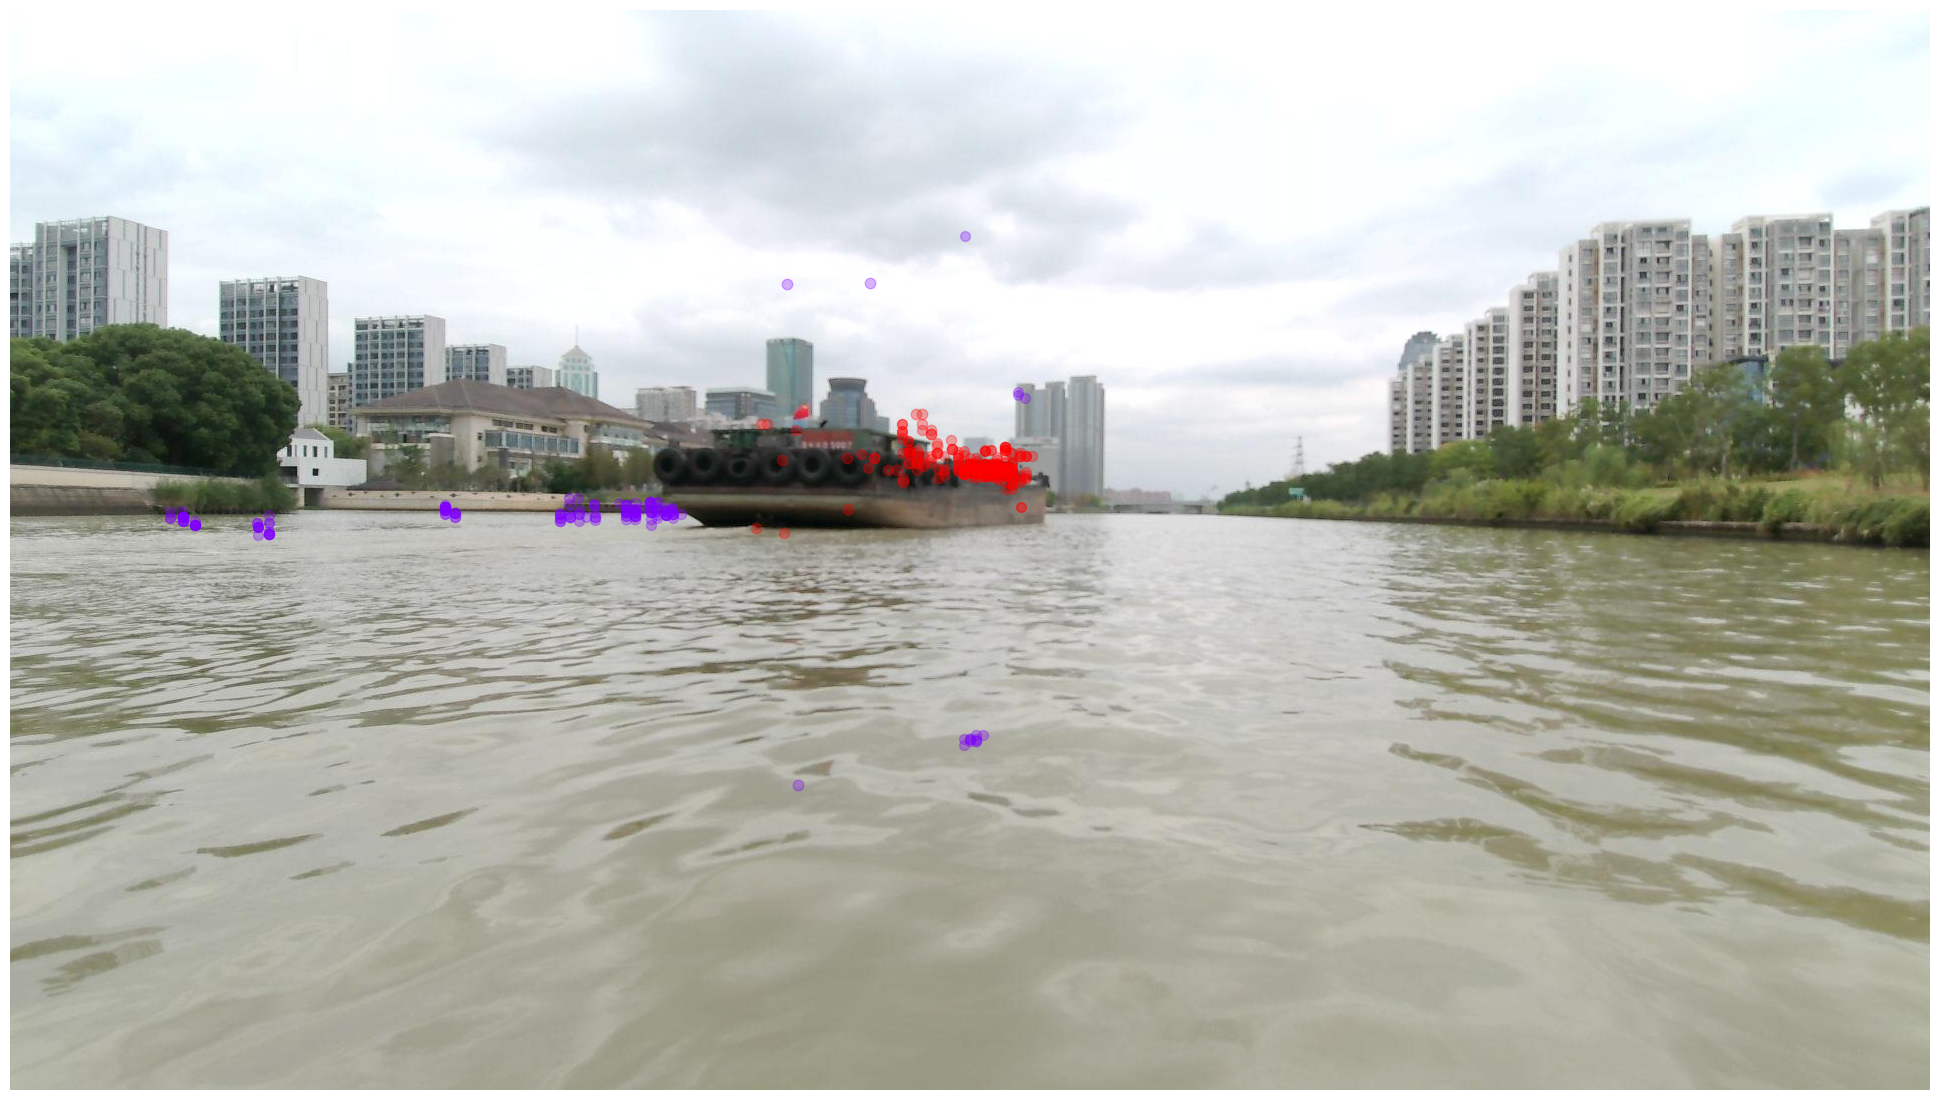

In [9]:
fig = plt.figure(figsize=(19.2, 10.8))
plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
plt.margins(0, 0)
plt.clf()
fig.set_dpi(100)
plt.scatter(radar_point[['u']], radar_point[['v']], cmap="rainbow", alpha=0.3, c=labels, s=radar_point[['rcs']]+40,)
plt.axis('off')   # 去坐标轴
plt.xticks([])    # 去 x 轴刻度
plt.yticks([])    # 去 y 轴刻度
plt.imshow(img)

In [10]:
labels_3D = ['r' if c>0 else 'b' for c in labels ]

C:\Users\Zz\AppData\Local\Temp\ipykernel_22012\784518307.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


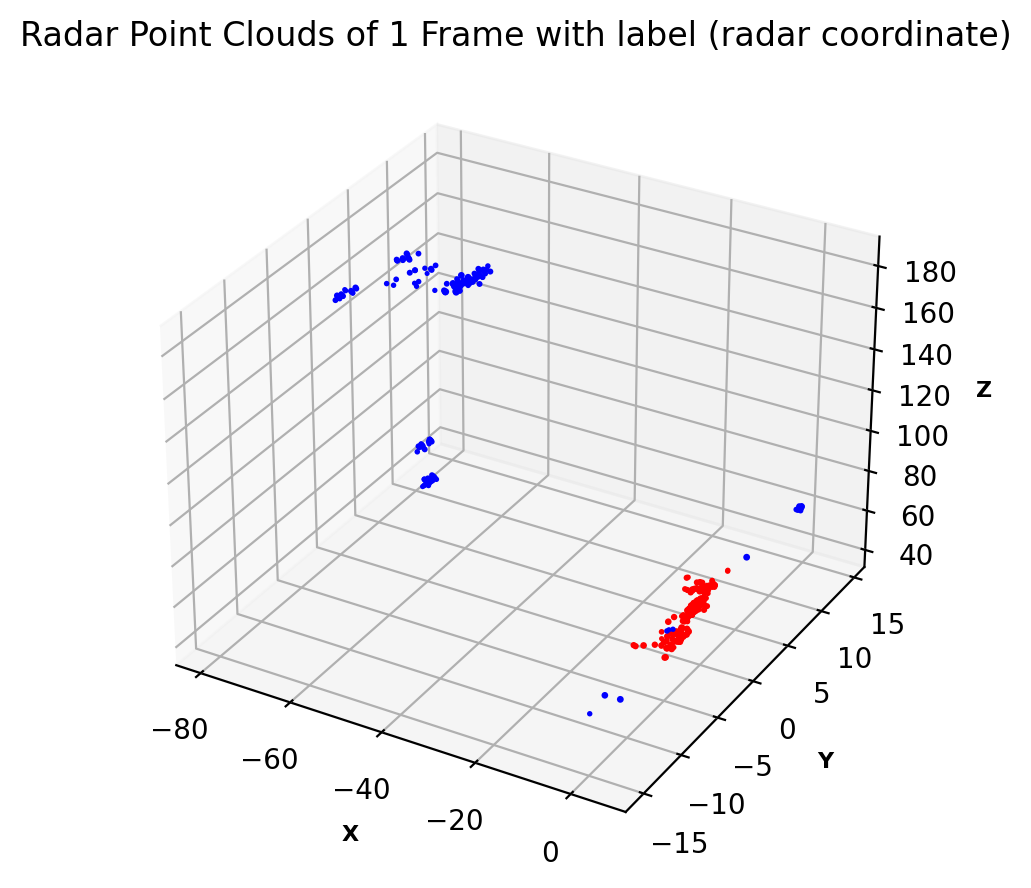

In [11]:
from mpl_toolkits.mplot3d import Axes3D 

fig=plt.figure(dpi=200)
ax = Axes3D(fig)
ax.scatter(radar_point[['x']], radar_point[['y']], radar_point[['z']], 
           cmap='spectral',
           s=radar_point[['rcs']]+6,
           linewidth=0,
           alpha=1,
           marker=".",
           c=labels_3D,
          )

ax.set_xlabel('X', fontsize=8, fontweight='bold')
ax.set_ylabel('Y', fontsize=8, fontweight='bold')
ax.set_zlabel('Z', fontsize=8, fontweight='bold')

ax.set_title("Radar Point Clouds of 1 Frame with label (radar coordinate)")

plt.show()

C:\Users\Zz\AppData\Local\Temp\ipykernel_22012\3866303465.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


Text(0.5, 0.92, 'Radar Point Clouds of 1 Frame with label (world coordinate)')

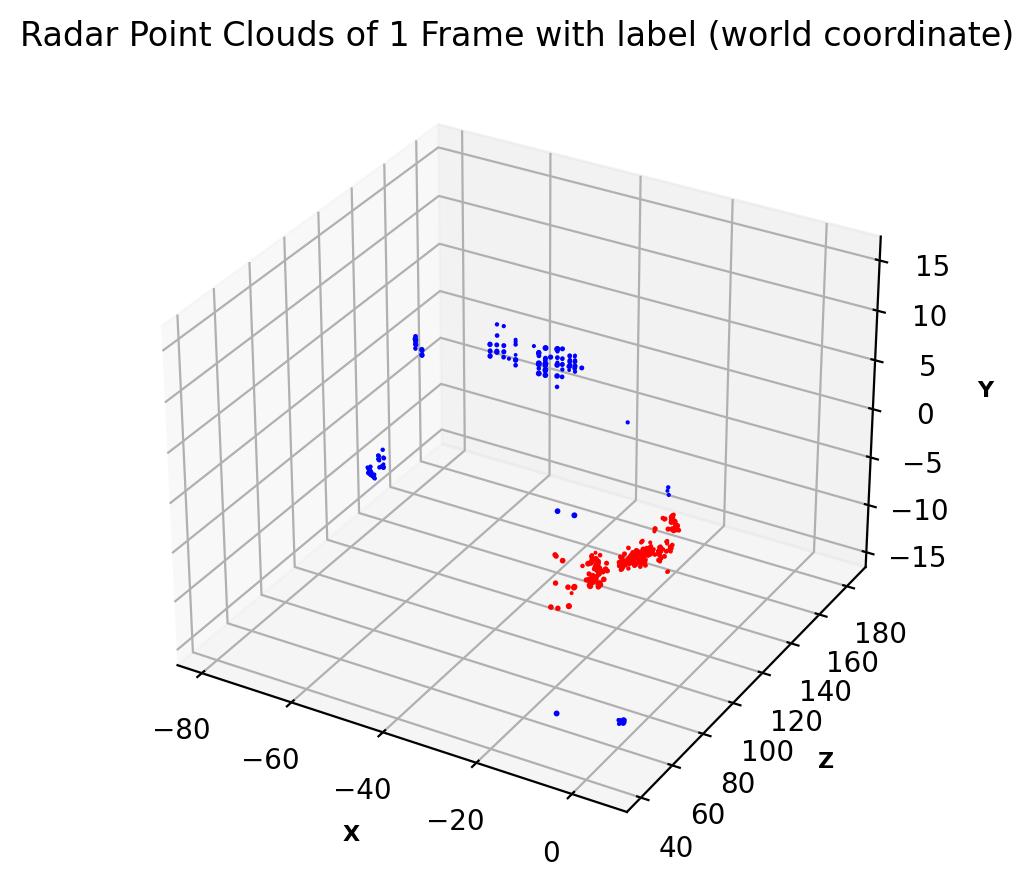

In [12]:
from mpl_toolkits.mplot3d import Axes3D 

fig=plt.figure(dpi=200)
ax = Axes3D(fig)
ax.scatter(radar_point[['x']], radar_point[['z']], -radar_point[['y']], 
           cmap='spectral',
           s=radar_point[['rcs']],
           linewidth=0,
           alpha=1,
           marker=".",
           c=labels_3D)

ax.set_xlabel('X', fontsize=8, fontweight='bold')
ax.set_ylabel('Z', fontsize=8, fontweight='bold')
ax.set_zlabel('Y', fontsize=8, fontweight='bold')

ax.set_title("Radar Point Clouds of 1 Frame with label (world coordinate)")

C:\Users\Zz\AppData\Local\Temp\ipykernel_22012\3650570151.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


Text(0.5, 0.92, 'Radar Point Clouds of 3 Frames without label (world coordinate)')

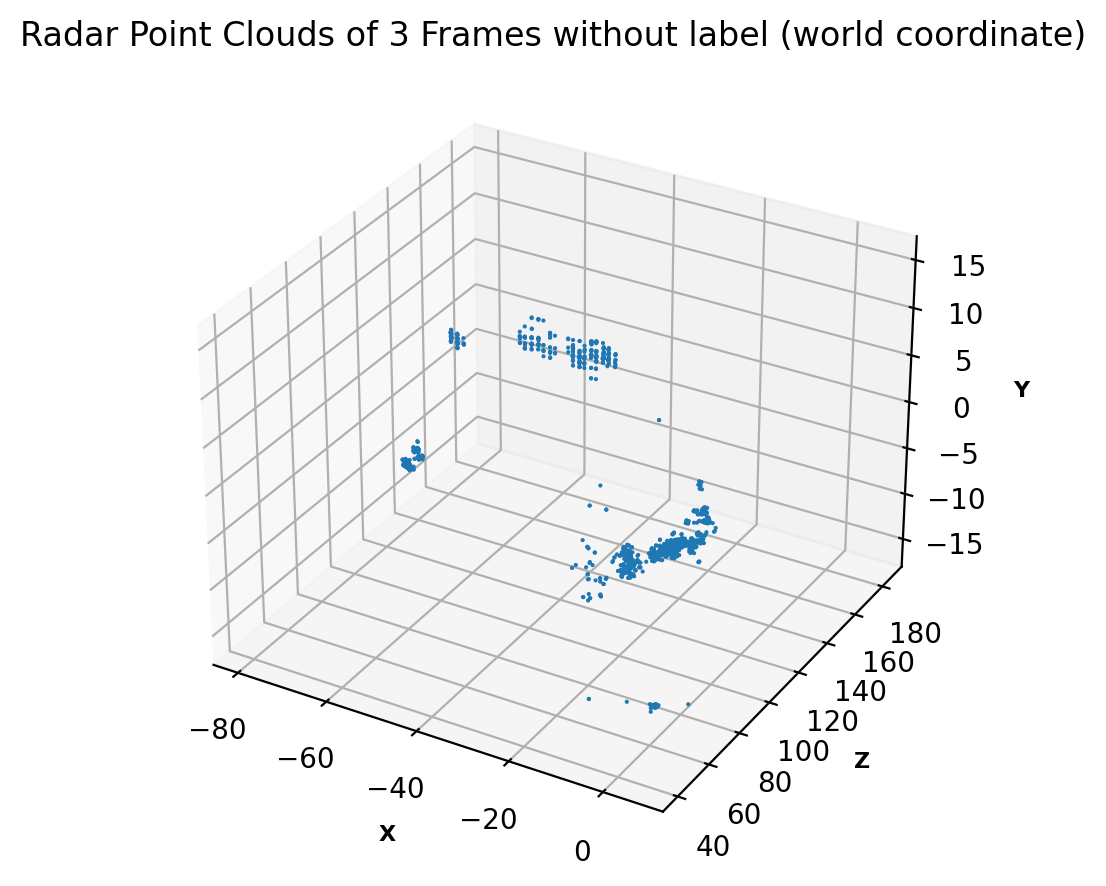

In [13]:
fig=plt.figure(dpi=200)
ax = Axes3D(fig)
# ax = fig.add_subplot(111, projection='3d')
ax.scatter(radar_point_3frames[['x']], radar_point_3frames[['z']], -radar_point_3frames[['y']],  
           cmap='spectral',
           s=9,
           linewidth=0,
           alpha=1,
           marker=".")

ax.set_xlabel('X', fontsize=8, fontweight='bold')
ax.set_ylabel('Z', fontsize=8, fontweight='bold')
ax.set_zlabel('Y', fontsize=8, fontweight='bold')

ax.set_title("Radar Point Clouds of 3 Frames without label (world coordinate)")